In [1]:
import numpy as np
import pandas
from keras.layers import *
from keras.models import Sequential, Model
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def zeroMean(dataMat):        
    meanVal=np.mean(dataMat,axis=0)     #get mean by columns
    newData=dataMat-meanVal  
    return newData,meanVal


def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)          #ascend order 
    sortArray=sortArray[-1::-1]           
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num  


def pca(dataMat,percentage=0.99):  
    newData,meanVal=zeroMean(dataMat)  
    covMat=np.cov(newData,rowvar=0)      #covariance  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))      
    n=percentage2n(eigVals,percentage)                 #need n dimensionol data to get the convariance percentage
    n = 6   # pca of 2017 rookies data is 6 dimentional 
    eigValIndice=np.argsort(eigVals)            #ascend order 
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]   
    n_eigVect=eigVects[:,n_eigValIndice]        
    lowDDataMat=newData*n_eigVect               #lower dimensional data  
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #reconstruct data  
    return lowDDataMat,reconMat

In [3]:
df = pandas.read_csv("04-16_NBA_rookies_data.csv", header=None)
df1 = pandas.read_csv("04-16_NBA_rookies_label.csv",header=None)
df_test = pandas.read_csv("2017rookies_data.csv",header=None)
df1_test = pandas.read_csv("2017rookies_name.csv",header=None)
ds = df.values
ds1 = df1.values
lowDDataMat,reconMat=pca(ds)  #pca
ds_test = df_test.values
lowDDataMat1,reconMat1=pca(ds_test)  #pca
ds1_test = df1_test.values

In [4]:
x_train = lowDDataMat[:,0:6]
y_train = ds1[:,1]
x_test = lowDDataMat1[:,0:6]
y_test = ds1_test[:,0]

dim = x_train.shape[1]
model = Sequential()
model.add(Dense(100, input_dim=dim, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [5]:
# Change log_dir for differnt activation function, change the number for every run.
tbCallBack = keras.callbacks.TensorBoard(log_dir='tensorboard/tanh/3', histogram_freq=0, write_graph=True, write_images=True)

In [6]:
idx = list(range(x_train.shape[0]))
np.random.shuffle(idx)
hist = model.fit(x_train[idx],y_train[idx],validation_split=0.2,epochs=100,shuffle=True, callbacks = [tbCallBack])
dnn_predict = model.predict_classes(x_test)
print(sum(dnn_predict))
print(y_test[dnn_predict == 1])

Train on 359 samples, validate on 90 samples
Epoch 1/100
359/359 [==============================] - 0s 150us/step - loss: 1.1377 - acc: 0.4763 - val_loss: 0.5747 - val_acc: 0.7222
Epoch 2/100
359/359 [==============================] - 0s 49us/step - loss: 0.8173 - acc: 0.6267 - val_loss: 0.5244 - val_acc: 0.7889
Epoch 3/100
359/359 [==============================] - 0s 53us/step - loss: 0.6178 - acc: 0.7242 - val_loss: 0.4828 - val_acc: 0.7778
Epoch 4/100
359/359 [==============================] - 0s 657us/step - loss: 0.5911 - acc: 0.7409 - val_loss: 0.4238 - val_acc: 0.8000
Epoch 5/100
359/359 [==============================] - 0s 51us/step - loss: 0.5086 - acc: 0.7549 - val_loss: 0.3891 - val_acc: 0.8222
Epoch 6/100
359/359 [==============================] - 0s 49us/step - loss: 0.4476 - acc: 0.8050 - val_loss: 0.3639 - val_acc: 0.8444
Epoch 7/100
359/359 [==============================] - 0s 50us/step - loss: 0.5201 - acc: 0.7772 - val_loss: 0.3415 - val_acc: 0.8444
Epoch 8/100
359

359/359 [==============================] - 0s 567us/step - loss: 0.1348 - acc: 0.9499 - val_loss: 0.1813 - val_acc: 0.9222
Epoch 62/100
359/359 [==============================] - 0s 314us/step - loss: 0.1698 - acc: 0.9192 - val_loss: 0.1873 - val_acc: 0.9222
Epoch 63/100
359/359 [==============================] - 0s 65us/step - loss: 0.1681 - acc: 0.9304 - val_loss: 0.1866 - val_acc: 0.9444
Epoch 64/100
359/359 [==============================] - 0s 42us/step - loss: 0.1698 - acc: 0.9276 - val_loss: 0.1798 - val_acc: 0.9444
Epoch 65/100
359/359 [==============================] - 0s 39us/step - loss: 0.1643 - acc: 0.9304 - val_loss: 0.1748 - val_acc: 0.9222
Epoch 66/100
359/359 [==============================] - 0s 46us/step - loss: 0.1521 - acc: 0.9248 - val_loss: 0.1799 - val_acc: 0.9222
Epoch 67/100
359/359 [==============================] - 0s 45us/step - loss: 0.1541 - acc: 0.9359 - val_loss: 0.1795 - val_acc: 0.9333
Epoch 68/100
359/359 [==============================] - 0s 55us/st

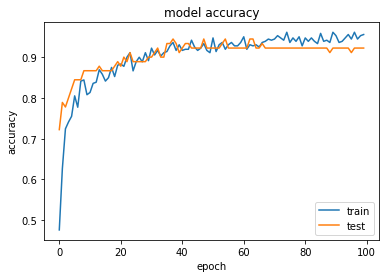

In [7]:
plt.figure(1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

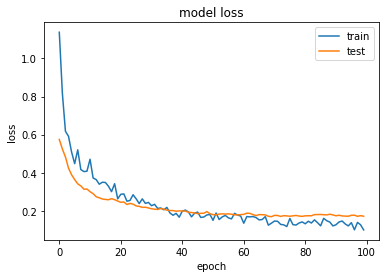

In [8]:
plt.figure(2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()